# 1.Chuẩn bị các thư viện

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2.Quan sát dữ liệu

In [3]:
data = pd.read_csv('../Data/Loan_default.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# 3.Xử lý dữ liệu

### 3.1.Xử lý dữ liệu trùng lặp và thiếu

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### 3.2.Xử lý dữ liệu object

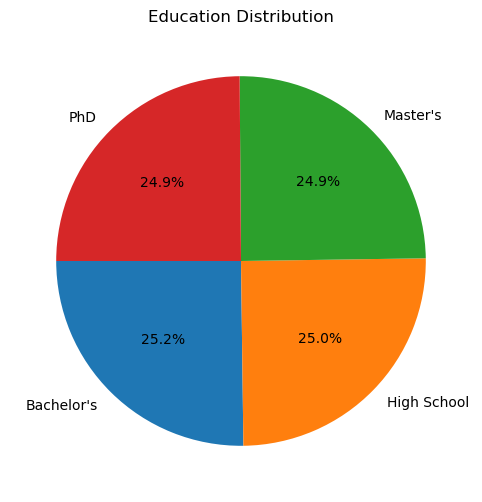

In [7]:
education_cout = data['Education'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(education_cout, labels=education_cout.index, autopct='%1.1f%%', startangle=180)
plt.title('Education Distribution')
plt.show()

In [8]:
education_map = {'PhD': 0, "Master's": 1, "Bachelor's": 2, 'High School': 3}
data['Education'] = data['Education'].map(education_map)

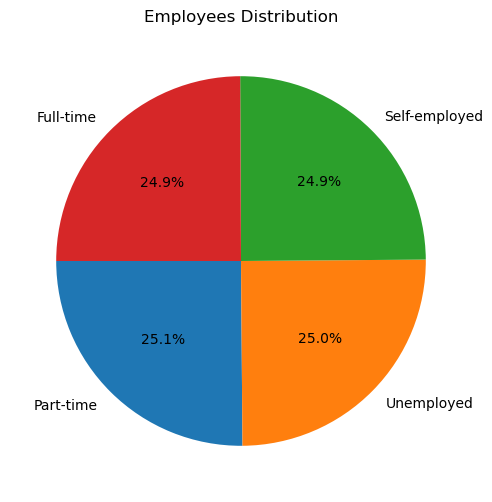

In [9]:
employees = data['EmploymentType'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(employees, labels=employees.index, autopct='%1.1f%%', startangle=180)
plt.title('Employees Distribution')
plt.show()

In [10]:
data['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [11]:
employees_map = {'Full-time': 0, 'Part-time': 1, 'Self-employed': 2, 'Unemployed': 3}
data['EmploymentType'] = data['EmploymentType'].map(employees_map)


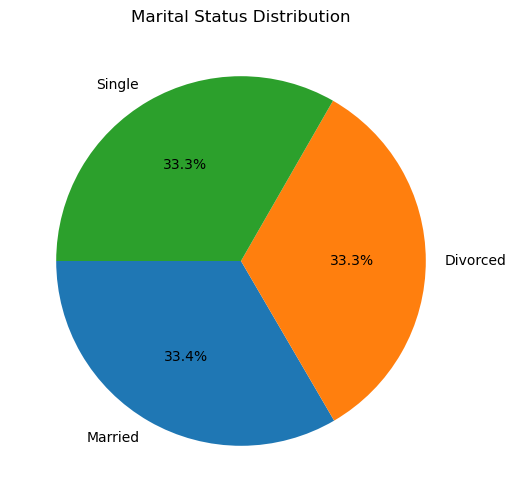

In [12]:
marital_status = data['MaritalStatus'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%', startangle=180)
plt.title('Marital Status Distribution')
plt.show()

In [13]:
MaritalStatus_map = {'Single': 0, 'Married': 1, 'Divorced': 2}
data['MaritalStatus'] = data['MaritalStatus'].map(MaritalStatus_map)


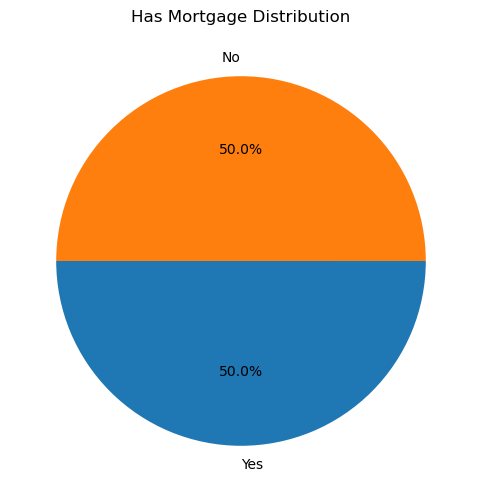

In [14]:
hasmore_count = data['HasMortgage'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(hasmore_count, labels=hasmore_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Has Mortgage Distribution')
plt.show()

In [15]:
HasMortgage_map = {'No': 0, 'Yes': 1}
data['HasMortgage'] = data['HasMortgage'].map(HasMortgage_map)

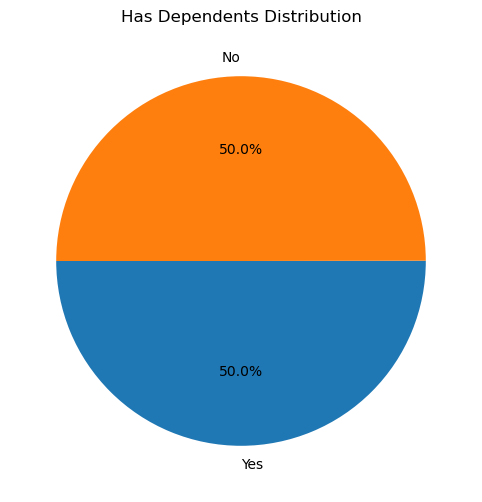

In [16]:
hasdependent_count = data['HasDependents'].value_counts()
plt.figure(figsize=(10,6))

plt.pie(hasdependent_count, labels=hasdependent_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Has Dependents Distribution')
plt.show()

In [17]:
hasdependent_map = {'No': 0, 'Yes': 1}
data['HasDependents'] = data['HasDependents'].map(hasdependent_map)

In [18]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,2,0,2,1,1,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,0,0,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,1,3,2,1,1,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,3,0,1,0,0,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,2,3,2,0,1,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,2,0,1,0,0,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,3,1,2,0,0,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,3,2,1,1,1,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,3,1,0,1,1,Other,No,0


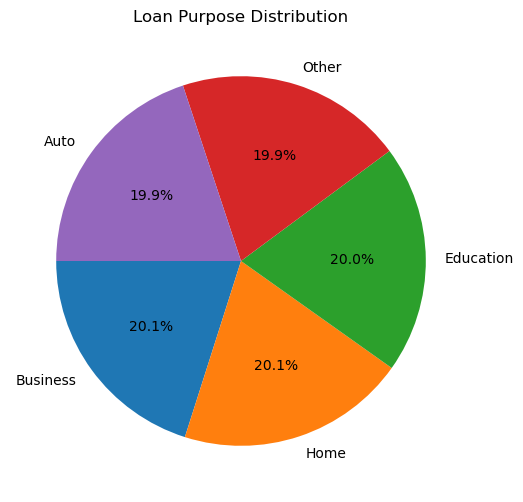

In [19]:
LoanPurpose_count = data['LoanPurpose'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(LoanPurpose_count, labels=LoanPurpose_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Loan Purpose Distribution')
plt.show()

In [20]:
loanpurpose_map = {'Auto':0, 'Home':1, 'Education':2, 'Personal':3,'Business':4,'Other':5}
data['LoanPurpose'] = data['LoanPurpose'].map(loanpurpose_map)

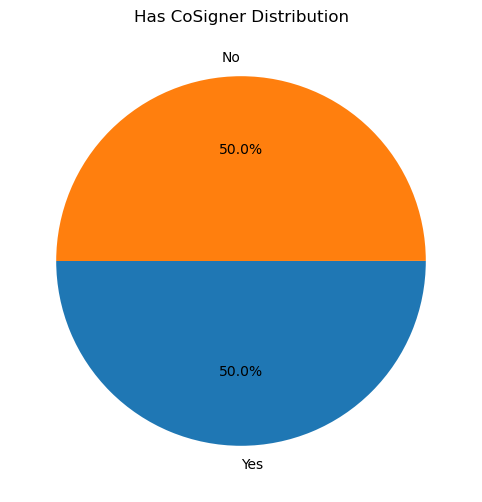

In [21]:
HasCoSigner_count = data['HasCoSigner'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(HasCoSigner_count, labels=HasCoSigner_count.index, autopct='%1.1f%%', startangle=180)
plt.title('Has CoSigner Distribution')
plt.show()

In [22]:
hascosigner_map = {'No': 0, 'Yes': 1}
data['HasCoSigner'] = data['HasCoSigner'].map(hascosigner_map)

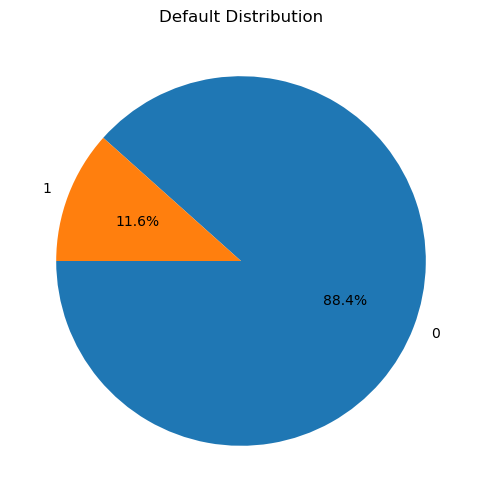

In [23]:
default_count = data['Default'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(default_count, labels=default_count.index, autopct='%1.1f%%', startangle=180)

plt.title('Default Distribution')
plt.show()

# 4.Xây dựng mô hình dự đoán

In [24]:
data = data.drop('LoanID', axis=1)

In [25]:
data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,2,0,2,1,1,5,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,1,0,1,0,0,5,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,3,2,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,3,0,1,0,0,4,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,2,3,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,2,0,1,0,0,5,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,3,1,2,0,0,1,0,1
255344,56,84820,208294,597,70,3,5.29,60,0.50,3,2,1,1,1,0,1,0
255345,42,85109,60575,809,40,1,20.90,48,0.44,3,1,0,1,1,5,0,0


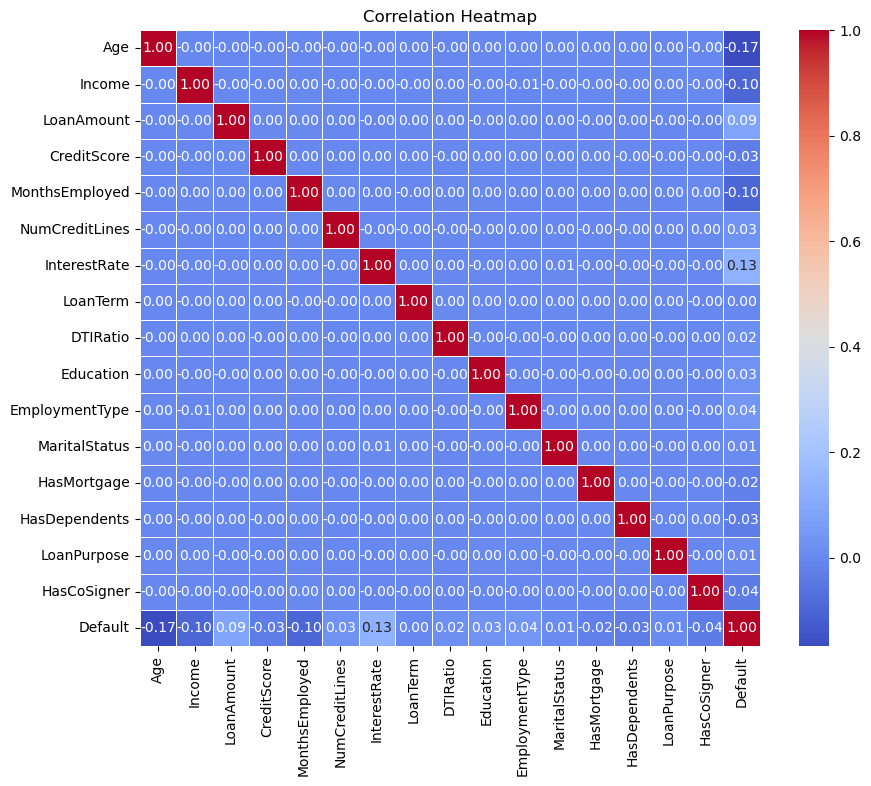

In [26]:
#Tính toán ma trận tương quan
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Tách dữ liệu vào X (features) và y (target)
X = data.drop('Default', axis=1)
y = data['Default']

In [28]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:

# Khởi tạo Logistic Regression với trọng số tự động cân bằng
model = LogisticRegression(class_weight='balanced', random_state=42)

In [31]:

# Huấn luyện mô hình
model.fit(X_train, y_train)

c:\Users\huuna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [32]:

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [33]:

# Đánh giá mô hình
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     45170
           1       0.21      0.67      0.32      5900

    accuracy                           0.67     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.85      0.67      0.73     51070



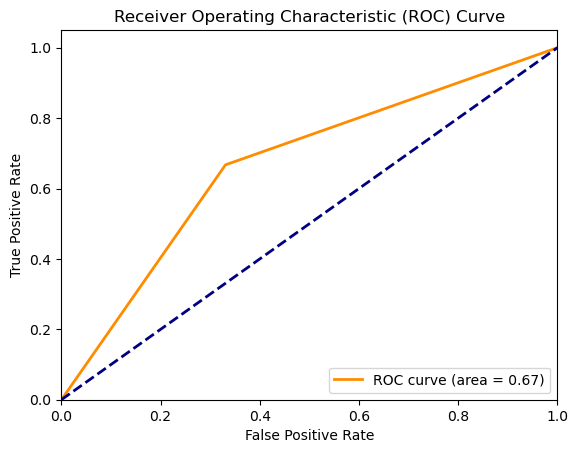

In [34]:
from sklearn.metrics import roc_curve, auc

# Vẽ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [35]:
# Đánh giá mô hình trên dữ liệu huấn luyện
train_score = model.score(X_train, y_train)
print(f'Train accuracy: {train_score}')

# Đánh giá mô hình trên dữ liệu kiểm tra
test_score = model.score(X_test, y_test)
print(f'Test accuracy: {test_score}')


Train accuracy: 0.6676326752399927
Test accuracy: 0.6689641668298414


In [36]:
import joblib
# Lưu mô hình
joblib.dump(model, '../models/logistic_regression_model.joblib')

['../models/logistic_regression_model.joblib']